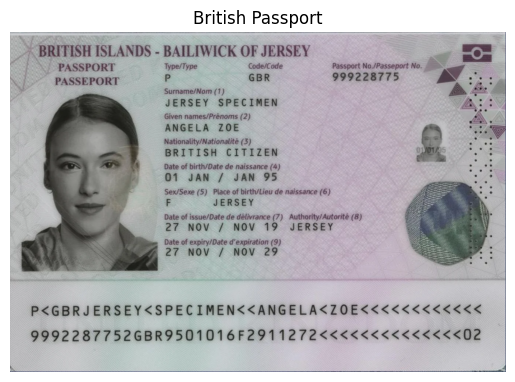

🧾 OCR Extracted Text:

» BRITISH ISLANDS - BAILIWICK OF JERSEY

Code/Code
GBR

- PASSPORT Type/Type
PASSEPORT P
Surname/Nom (1)
JERSEY SPECIMEN

Given names/Prénoms (2)

ANGELA ZOE

Nationality/Nationalité (3)

BRITISH CITIZEN

Date of birth/Date de naissance (4)

O01 JAN / JAN 95

Sex/Sexe (5) Place of birth/Lieu de naissance (6)

2 JERSEY

Date of issue/Date de délivrance (7) Authority/Autorité (8)
27 NOV / NOV 19 JERSEY

Date of expiry/Date d’expiration (9)

27 NOV / NOV 29

Passport
9992

No./Passeport No.
28775

Rig

P<GBRJERSEY<SPECIMEN<<ANGELA<ZOE<<<<<<<<<<<<¢
9992287752GBR9501016F2911272<<<<<<<<<<<<<<02




In [5]:
# --- OCR British Passport Example ---

from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

# Path to your passport image (update path if needed)
image_path = r"D:\AngularWebsite\NodeJSBackend\uploads\BristishPassport.png"

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis("off")
plt.title("British Passport")
plt.show()

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# Run OCR using Tesseract
extracted_text = pytesseract.image_to_string(img)

print("🧾 OCR Extracted Text:\n")
print(extracted_text)

In [8]:
from PIL import Image
import pytesseract
import ollama
import json

# 3️⃣ Prompt LLaMA 3.1 directly (no subprocess)
prompt = f"""
You are an expert in document analysis.
Below is OCR text from a scanned identity document.

Please:
1. Identify the document type (e.g., Passport, AadharCard, etc.).
2. Extract all meaningful fields and their values.
3. Use consistent field keys like: "FirstName", "MiddleName", "LastName", "DOB", "Nationality", "PassportNumber", etc.
4. Output strictly valid JSON with this structure:

{{
  "docType": "<Type>",
  "fields": {{
    "key": "value",
    ...
  }}
}}

Here is the OCR text:
---
{extracted_text}
---
Respond ONLY with JSON (no explanations).
"""

# 4️⃣ Run Ollama LLaMA 3.1 model locally
response = ollama.chat(
    model="llama3.1",
    messages=[
        {"role": "system", "content": "You extract structured information from scanned documents."},
        {"role": "user", "content": prompt}
    ]
)

# 5️⃣ Parse and display JSON result
raw_output = response['message']['content'].strip()

try:
    data = json.loads(raw_output)
    print("✅ Parsed JSON Output:\n")
    print(json.dumps(data, indent=2))
except json.JSONDecodeError:
    print("⚠️ Model output was not valid JSON:\n")
    print(raw_output)


✅ Parsed JSON Output:

{
  "docType": "Passport",
  "fields": {
    "GivenNames": "Angela Zoe",
    "Nationality": "British Citizen",
    "DateOfBirth": "01 Jan 95",
    "PlaceOfBirth": "Jersey",
    "Sex": "",
    "Authority": "Jersey",
    "IssueDate": "27 Nov 19",
    "ExpiryDate": "27 Nov 29",
    "PassportNumber": "28775",
    "NationalityCode": "GBR"
  }
}
